- **Name: Amitesh Ranjan**

- **Data Science and Business Analytics**

* **Task 3 - Exploratory Data Analysis - Retail**

* **GRIP - The Sparks Foundation**

# Prediction Using Supervised ML
#### Simple Linear Regression
## Exploratory Data Analysis - Retail

In [1]:
# import Required library for ML
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

## Data Exploration

In [2]:
path = './DataSet/SampleSuperstore.csv'
SupperstorDf = pd.read_csv(path)

In [3]:
SupperstorDf.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
# Number of Row and columns in Superstore Dataframe
SupperstorDf.shape

(9994, 13)

In [5]:
SupperstorDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
dup = SupperstorDf.duplicated()

In [7]:
dup.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [8]:
# Drop all Duplicate Data 
SupperstorDf.drop_duplicates(inplace= True)

In [9]:
SupperstorDf.shape

(9977, 13)

In [10]:
SupperstorDf.duplicated().sum()

0

In [11]:
SupperstorDf['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [12]:
SupperstorDf['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [13]:
SupperstorDf['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [14]:
SupperstorDf['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [15]:
SupperstorDf['Country'].unique()

array(['United States'], dtype=object)

In [16]:
SupperstorDf['City'].nunique()

531

In [17]:
SupperstorDf['State'].nunique()

49

In [18]:
SupperstorDf['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [19]:
SupperstorDf['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [20]:
SupperstorDf['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

In [21]:
SupperstorDf['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [22]:
SupperstorDf['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [23]:
SupperstorDf['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [24]:
SupperstorDf['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [25]:
SupperstorDf['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12],
      dtype=int64)

In [26]:
SupperstorDf['Quantity'].value_counts()

3     2400
2     2399
5     1230
4     1186
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [27]:
SupperstorDf[SupperstorDf['Quantity']>13].shape

(29, 13)

In [28]:
SupperstorDf[['Profit', 'Discount','Sales']].describe()

,Profit,Discount,Sales
count,9977.00000,9977.000000,9977.000000
mean,28.69013,0.156278,230.148902
std,234.45784,0.206455,623.721409
min,-6599.97800,0.000000,0.444000
25%,1.72620,0.000000,17.300000
50%,8.67100,0.200000,54.816000
75%,29.37200,0.200000,209.970000
max,8399.97600,0.800000,22638.480000


In [29]:
SupperstorDf.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


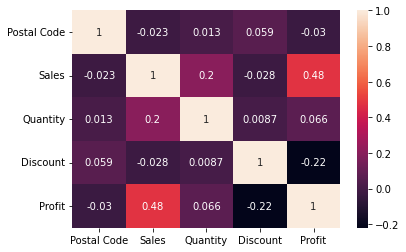

In [30]:
sb.heatmap(SupperstorDf.corr(), annot=True);

### We Need Which Product is sales most 

In [31]:
SupperstorDf['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

<AxesSubplot:xlabel='Category', ylabel='count'>

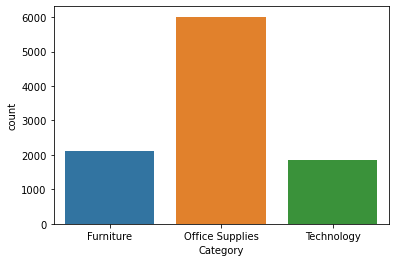

In [32]:
sb.countplot(x=SupperstorDf['Category'])

<AxesSubplot:xlabel='Quantity', ylabel='count'>

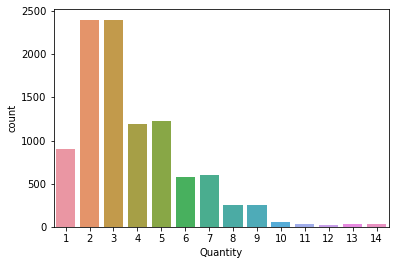

In [33]:
sb.countplot(x=SupperstorDf['Quantity'])

<AxesSubplot:xlabel='Region', ylabel='count'>

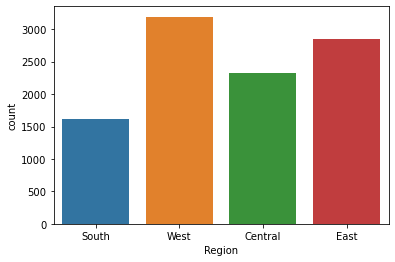

In [34]:
sb.countplot(x=SupperstorDf['Region'])

<AxesSubplot:xlabel='Segment', ylabel='count'>

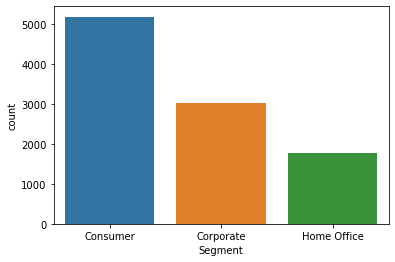

In [35]:
sb.countplot(x=SupperstorDf['Segment'])

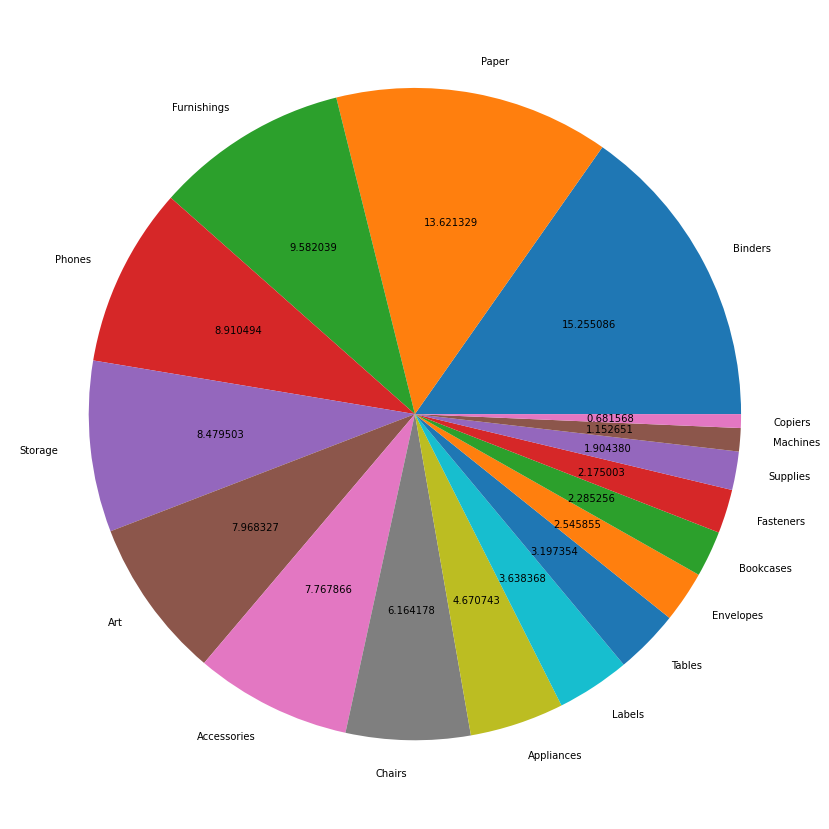

In [36]:
plt.figure(figsize=(15,15))
plt.pie(SupperstorDf["Sub-Category"].value_counts(), labels= SupperstorDf["Sub-Category"].value_counts().index, autopct ="%2f")
plt.show()

In [37]:
binder_df = SupperstorDf[SupperstorDf['Sub-Category'] == 'Binders']

In [38]:
binder_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825
13,Standard Class,Consumer,United States,Seattle,Washington,98103,West,Office Supplies,Binders,407.976,3,0.2,132.5922
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
20,Second Class,Consumer,United States,San Francisco,California,94109,West,Office Supplies,Binders,22.720,4,0.2,7.3840
25,Second Class,Consumer,United States,Los Angeles,California,90049,West,Office Supplies,Binders,11.648,2,0.2,4.2224


In [39]:
#sb.catplot(data=binder_df,x='Sub-Category',y='Profit', kind="swarm")

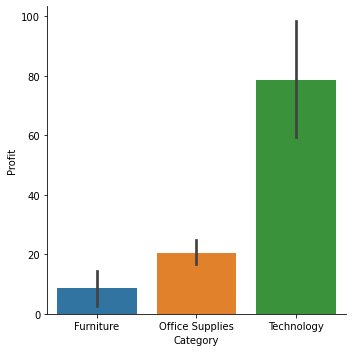

In [40]:
sb.catplot(data=SupperstorDf,x='Category',y='Profit', kind="bar")

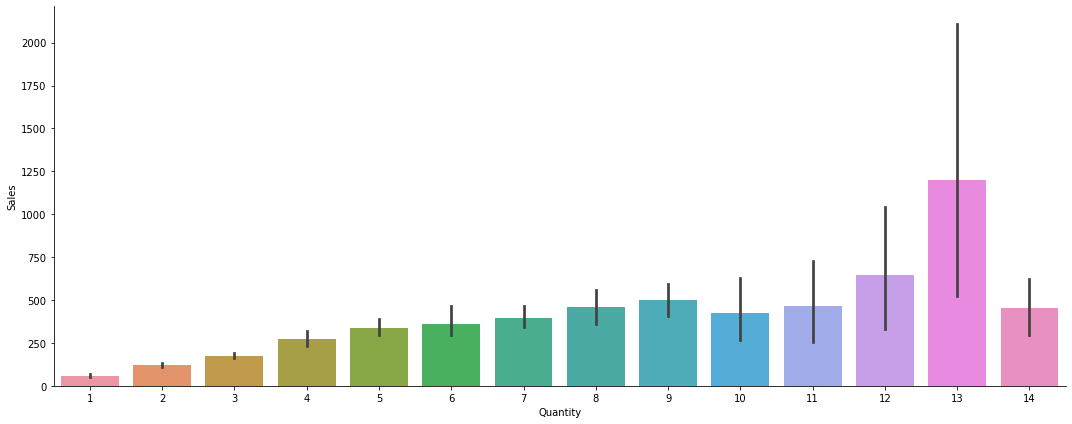

In [41]:
sb.catplot(data=SupperstorDf, x='Quantity', y='Sales', kind='bar', height=6, aspect=15/6);

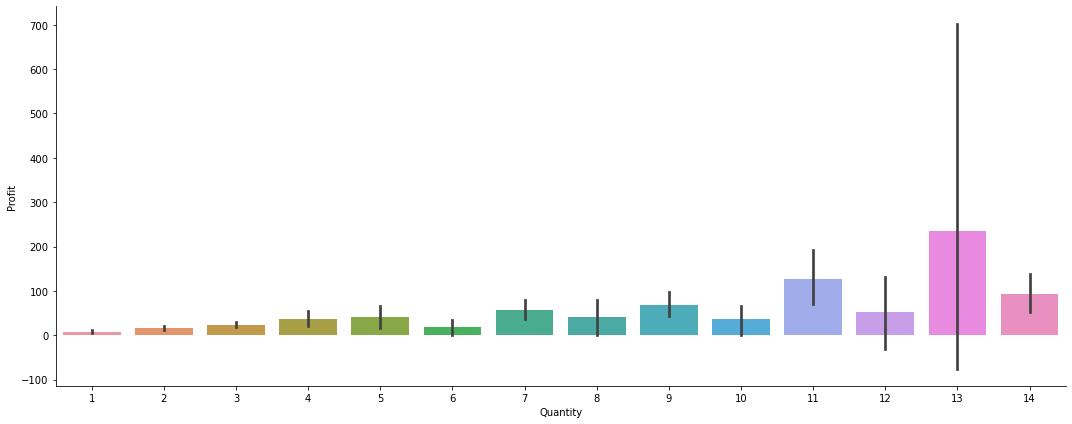

In [42]:
sb.catplot(data=SupperstorDf, x='Quantity', y='Profit', kind='bar', height=6, aspect=15/6)

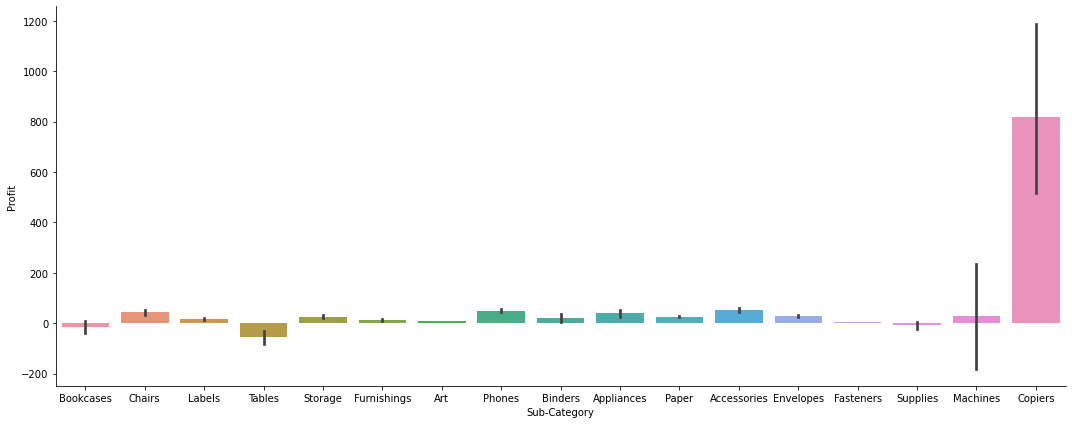

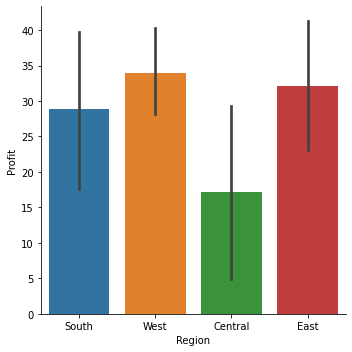

In [43]:
sb.catplot(data=SupperstorDf, x='Sub-Category', y='Profit', kind='bar', height=6, aspect=15/6)
sb.catplot(data=SupperstorDf, x='Region', y='Profit', kind='bar')

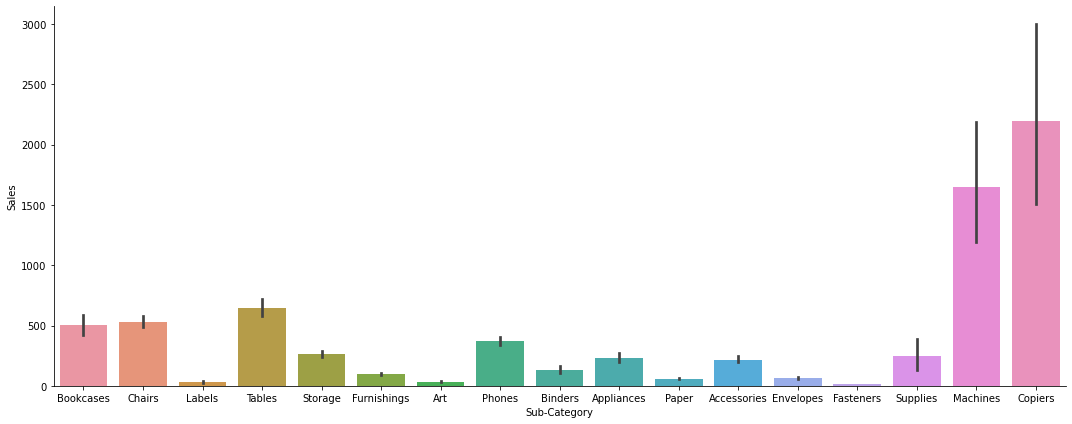

In [44]:
sb.catplot(data=SupperstorDf, x='Sub-Category', y='Sales', kind='bar', height=6, aspect=15/6)

In [45]:
West_df = SupperstorDf[SupperstorDf['Region'] == 'West']

In [46]:
West_df.shape

(3193, 13)

In [47]:
West_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825


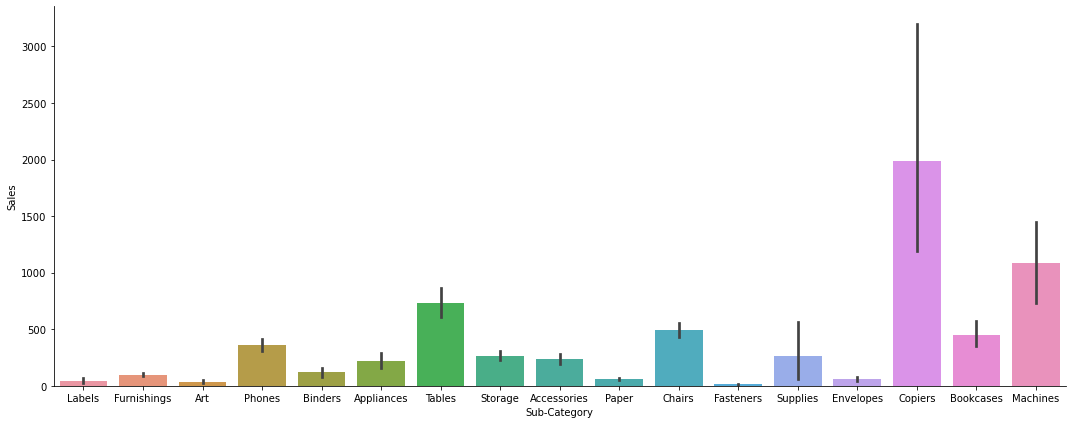

In [48]:
sb.catplot(data=West_df, x='Sub-Category', y='Sales', kind='bar', height=6, aspect=15/6)

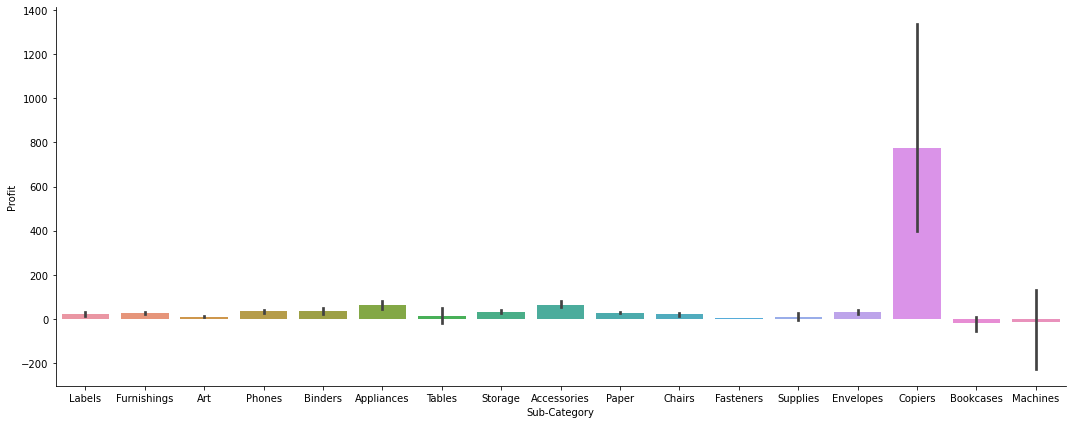

In [49]:
sb.catplot(data=West_df, x='Sub-Category', y='Profit', kind='bar', height=6, aspect=15/6)

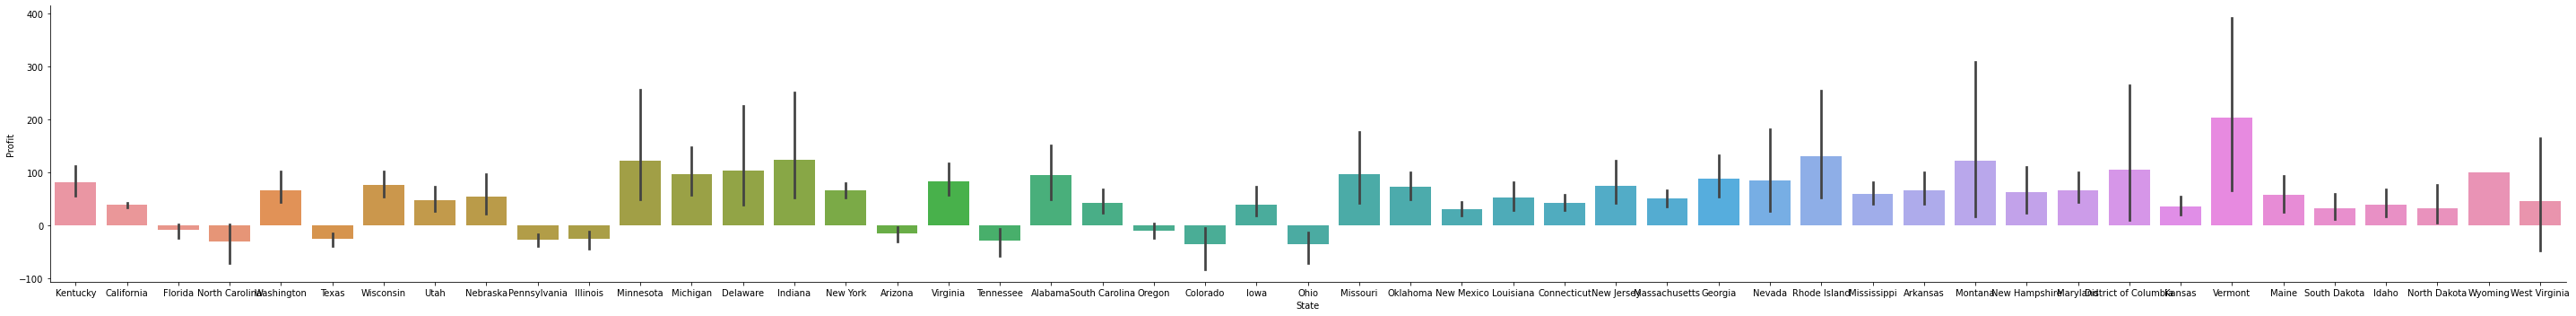

In [50]:
sb.catplot(data=SupperstorDf, x='State', y='Profit', kind='bar', height=5, aspect=40/5)

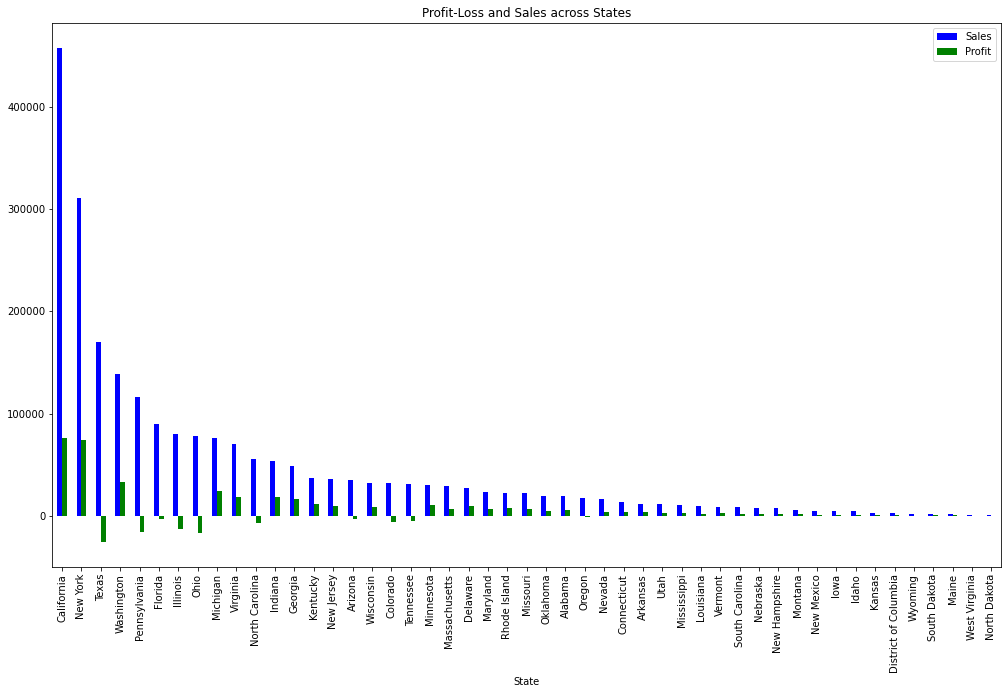

In [51]:
#Check State wise Profit
data1= SupperstorDf.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
data1[:].plot.bar(color = ["blue","Green"], figsize=(17,10))
plt.title("Profit-Loss and Sales across States")
plt.show()

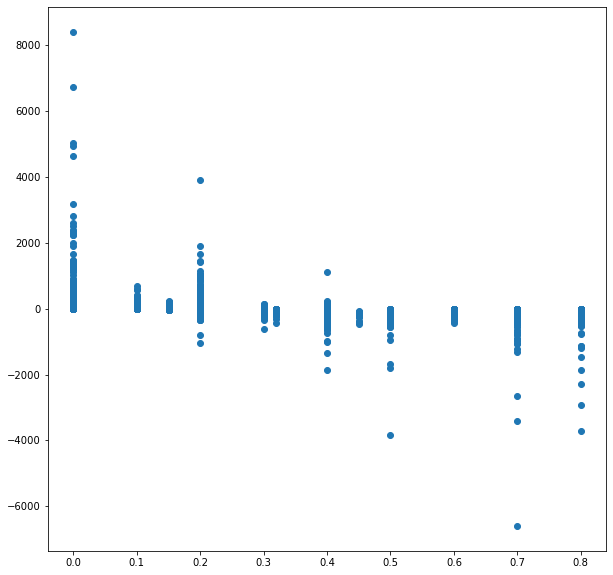

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(SupperstorDf['Discount'], SupperstorDf['Profit'])
plt.show()

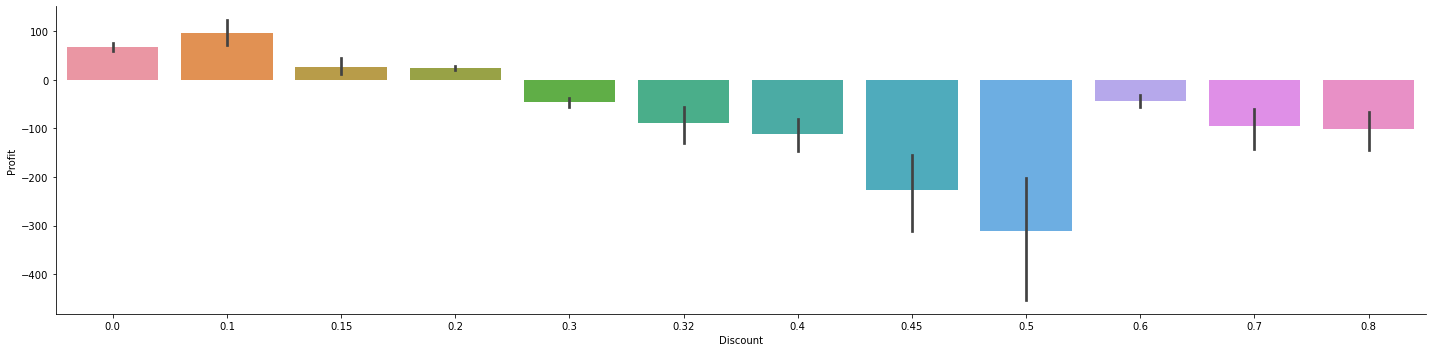

In [53]:
sb.catplot(data=SupperstorDf, x='Discount', y='Profit', kind='bar', height=5, aspect=20/5)

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

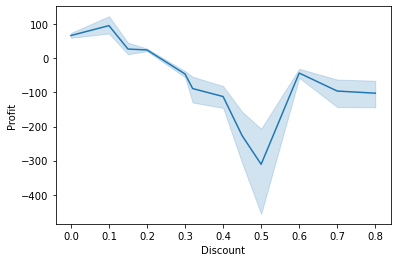

In [54]:
sb.lineplot(data=SupperstorDf, x="Discount", y= "Profit")

**After See Above plot We can say "Discount and profit are inversely proportional to each other."**

## What we observe: Conclusion:

- Profit and Discount correlation is lower and thease are weak and strong area of profit
- From Above line plot We can easly understand that if we give more than 0.3 or 30% discount we get less profit in each category  product.
- We can also see above information in catplot between **Discount** and **Profit**.
- **California** and **New York** these are two city where maximum sale and profit of each category product.
- Since, 0% discount provides sell sales with more quantity and more profit. Hence, I recommend to sell products at 0% discount, that is products with no discount at lowest price which makes more sales and more profit to the organization.

### Thank You